In [1]:
# Tomita 3
import torch
import torch.nn as nn
import math 
import os
import copy
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#print("Current Working Directory:", os.getcwd())
os.chdir( '/home/jupyter-nadia/bachelor-arbeit')

In [5]:
import Experiments.Model as Model
from Experiments.Pre_process_data import stats, stats_avg

In [4]:
# get stats of language
max, train_src, train_tgt, bin0_src, bin0_tgt, bin1_src, bin1_tgt = stats('data/Data_from_paper/Tomita-3')
print('max_len:', max, '\ntrain_src:', train_src, '\ntrain_tgt:', train_tgt, '\nbin0_src:', bin0_src, '\nbin0_tgt:', bin0_tgt, '\nbin1_src:', bin1_src, '\nbin1_tgt:', bin1_tgt)


max_len: 100 
train_src: 10000 
train_tgt: 10000 
bin0_src: 2000 
bin0_tgt: 2000 
bin1_src: 2000 
bin1_tgt: 2000


In [ ]:
# 1. Recurrent (# 6 layers in the main code )
# lesser layers give us slightly worse accuracy
# to beat 4 layers 71%

In [6]:
#get stats of language
max, train_src, train_tgt, bin0_src, bin0_tgt, bin1_src, bin1_tgt = stats_avg('data/MyData/Tomita3')
print('max_len:', max, '\ntrain_src:', train_src, '\ntrain_tgt:', train_tgt, '\nbin0_src:', bin0_src, '\nbin0_tgt:', bin0_tgt, '\nbin1_src:', bin1_src, '\nbin1_tgt:', bin1_tgt)

max_len: 100 
train_src: 33.0038 
train_tgt: 66.0076 
bin0_src: 30.363 
bin0_tgt: 60.726 
bin1_src: 75.212 
bin1_tgt: 150.424


In [ ]:
# Tomita 3:

url = 'data/Data_from_paper/Tomita-3'
alibi = False
universal = False
no_posi_encoding = False
rope = False
tomita_3 = Model.run_model(url, learning_rate = 0.001, batch_size = 32, embedding_dim =32, nheads= 8, split = 0.8, optimizer = 'RMSPROP', inner_layer_dim = 64, scheduler_lr= 200000, dropout = 0.2, alibi = alibi, pos_enc= 'recurrent', no_posi_encoding= no_posi_encoding, universal = universal, layer_number_main= 8, rope = rope)

In [17]:
epochs = 100
tomita_3.train_eval(epochs)

Epoch [1/100], Loss: 0.038860, dev Accuracy: 70.40%
Epoch [2/100], Loss: 0.007862, dev Accuracy: 92.10%
Epoch [3/100], Loss: 0.004960, dev Accuracy: 94.80%
Epoch [4/100], Loss: 0.002073, dev Accuracy: 97.50%
Epoch [5/100], Loss: 0.002028, dev Accuracy: 97.20%
Epoch [6/100], Loss: 0.001241, dev Accuracy: 98.50%
Epoch [7/100], Loss: 0.001136, dev Accuracy: 98.30%
Epoch [8/100], Loss: 0.000815, dev Accuracy: 98.70%
Epoch [9/100], Loss: 0.000770, dev Accuracy: 98.90%
Epoch [10/100], Loss: 0.000763, dev Accuracy: 98.75%
Epoch [11/100], Loss: 0.000539, dev Accuracy: 99.00%
Epoch [12/100], Loss: 0.001050, dev Accuracy: 98.60%
Epoch [13/100], Loss: 0.000471, dev Accuracy: 99.00%
Epoch [14/100], Loss: 0.000243, dev Accuracy: 99.45%
Epoch [15/100], Loss: 0.000314, dev Accuracy: 99.35%
Epoch [16/100], Loss: 0.000152, dev Accuracy: 99.50%
Epoch [17/100], Loss: 0.000286, dev Accuracy: 99.35%
Epoch [18/100], Loss: 0.000221, dev Accuracy: 99.40%
Epoch [19/100], Loss: 0.000170, dev Accuracy: 99.60%
Ep

In [18]:
 tomita_3.test(0)

accuracy of all bin 0 is:  100.0 %


In [19]:
 tomita_3.test(1)

accuracy of all bin 1 is:  99.75 %


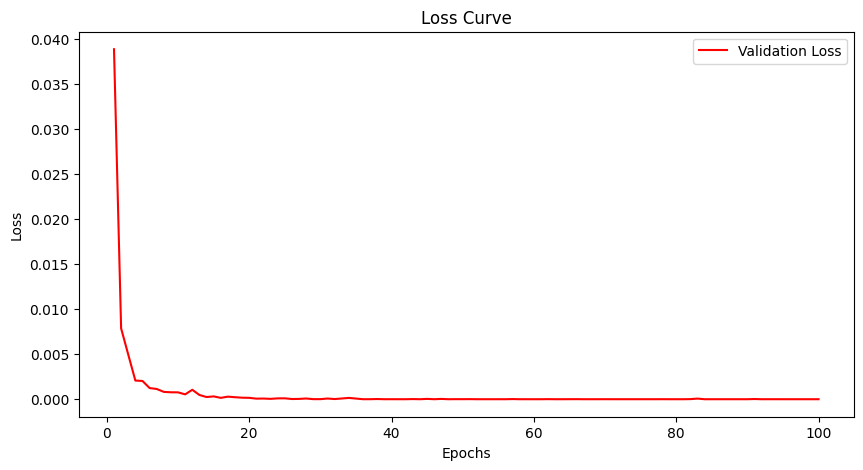

In [20]:
 tomita_3.visualize(epochs)

In [21]:
# Tomita 3:

url = 'data/Data_from_paper/Tomita-3'
alibi = False
universal = False
no_posi_encoding = False
tomita_3 = Model.run_model(url, learning_rate = 0.001, batch_size = 32, embedding_dim =32, nheads= 4, split = 0.8, optimizer = 'RMSPROP', inner_layer_dim = 64, scheduler_lr= 200000, dropout = 0.2, alibi = alibi, pos_enc= 'recurrent', no_posi_encoding= no_posi_encoding, universal = universal, layer_number_main= 8)

In [22]:
epochs = 100
tomita_3.train_eval(epochs)

Epoch [1/100], Loss: 0.035020, dev Accuracy: 69.55%
Epoch [2/100], Loss: 0.007345, dev Accuracy: 92.75%
Epoch [3/100], Loss: 0.003990, dev Accuracy: 95.55%
Epoch [4/100], Loss: 0.003046, dev Accuracy: 95.50%
Epoch [5/100], Loss: 0.002330, dev Accuracy: 97.30%
Epoch [6/100], Loss: 0.001227, dev Accuracy: 98.15%
Epoch [7/100], Loss: 0.000540, dev Accuracy: 99.10%
Epoch [8/100], Loss: 0.000608, dev Accuracy: 99.10%
Epoch [9/100], Loss: 0.000569, dev Accuracy: 99.25%
Epoch [10/100], Loss: 0.000583, dev Accuracy: 99.15%
Epoch [11/100], Loss: 0.000436, dev Accuracy: 99.30%
Epoch [12/100], Loss: 0.000466, dev Accuracy: 99.45%
Epoch [13/100], Loss: 0.000417, dev Accuracy: 99.55%
Epoch [14/100], Loss: 0.000507, dev Accuracy: 99.30%
Epoch [15/100], Loss: 0.000330, dev Accuracy: 99.30%
Epoch [16/100], Loss: 0.000434, dev Accuracy: 99.45%
Epoch [17/100], Loss: 0.000376, dev Accuracy: 99.40%
Epoch [18/100], Loss: 0.000203, dev Accuracy: 99.60%
Epoch [19/100], Loss: 0.000266, dev Accuracy: 99.60%
Ep

In [23]:
 tomita_3.test(0)

accuracy of all bin 0 is:  100.0 %


In [24]:
 tomita_3.test(1)

accuracy of all bin 1 is:  99.5 %


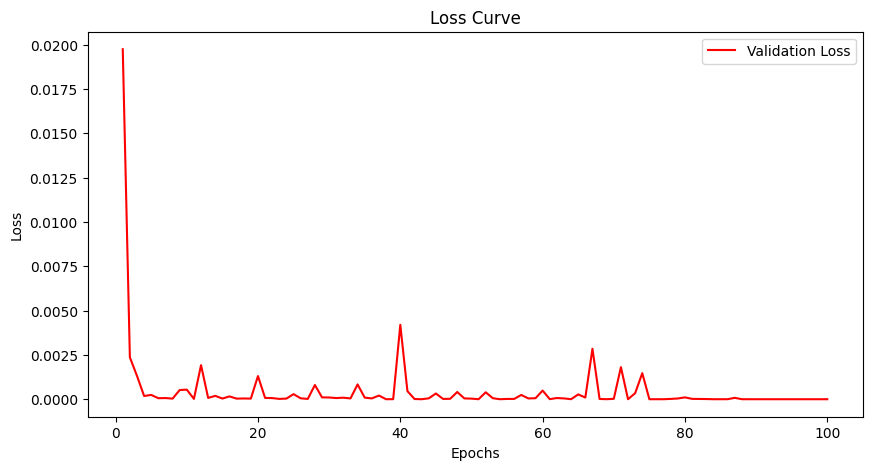

In [21]:
 tomita_3.visualize(epochs)

In [11]:
#2. Universal (# Layers = 8,
# accuracy of all bin 0 is:  99.6 %,
#accuracy of all bin 1 is:  98.15 %) No positional encoding
# Doing 10 now

In [9]:
url = 'data/Data_from_paper/Tomita-3'
alibi = False
universal = False
no_posi_encoding = True
universal = True
tomita_3 = Model.run_model(url, learning_rate = 0.001, batch_size = 32, embedding_dim =32, nheads= 8, split = 0.8, optimizer = 'RMSPROP', inner_layer_dim = 64, scheduler_lr= 200000, dropout = 0.2, alibi = alibi, pos_enc= 'recurrent', universal= universal, no_posi_encoding= no_posi_encoding, num_layers =8)

In [10]:
epochs = 100
tomita_3.train_eval(epochs)

Epoch [1/100], Loss: 0.060273, dev Accuracy: 56.25%
Epoch [2/100], Loss: 0.004336, dev Accuracy: 95.05%
Epoch [3/100], Loss: 0.001131, dev Accuracy: 98.05%
Epoch [4/100], Loss: 0.000286, dev Accuracy: 99.45%
Epoch [5/100], Loss: 0.000119, dev Accuracy: 99.80%
Epoch [6/100], Loss: 0.000062, dev Accuracy: 99.85%
Epoch [7/100], Loss: 0.000028, dev Accuracy: 99.95%
Epoch [8/100], Loss: 0.000044, dev Accuracy: 99.85%
Epoch [9/100], Loss: 0.000021, dev Accuracy: 99.95%


KeyboardInterrupt: 

In [ ]:
 tomita_3.test(0)

In [ ]:
 tomita_3.test(1)

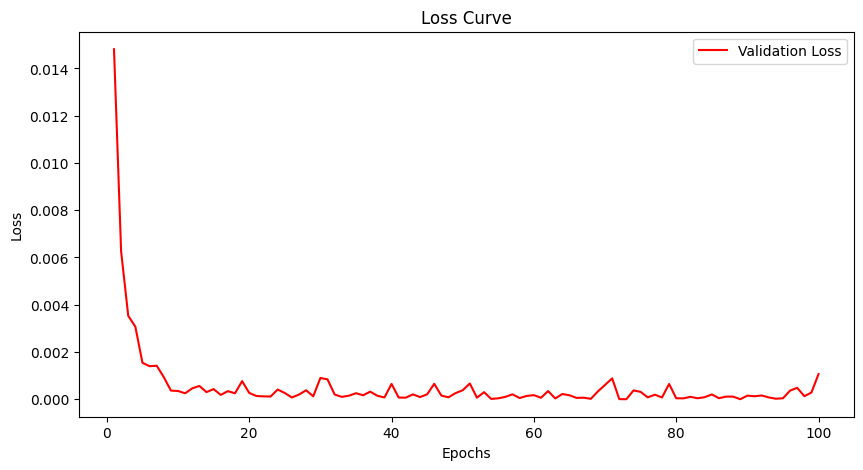

In [10]:
 tomita_3.visualize(epochs)

In [23]:
#3. No positional encoding: 

In [4]:
# Tomita 3:
url = 'data/Data_from_paper/Tomita-3'
alibi = False
universal = False
no_posi_encoding = True
tomita_3 = Model.run_model(url, learning_rate = 0.001, batch_size = 32, embedding_dim =64, nheads= 8, split = 0.8, optimizer = 'RMSPROP', inner_layer_dim = 32, scheduler_lr= 200000, dropout = 0.1, alibi = alibi, no_posi_encoding= no_posi_encoding, num_layers = 4)

In [5]:
epochs = 200
tomita_3.train_eval(epochs)

Epoch [1/200], Loss: 0.251819, dev Accuracy: 5.30%
Epoch [2/200], Loss: 0.237903, dev Accuracy: 6.55%
Epoch [3/200], Loss: 0.219968, dev Accuracy: 11.65%
Epoch [4/200], Loss: 0.223747, dev Accuracy: 8.30%
Epoch [5/200], Loss: 0.212855, dev Accuracy: 9.90%
Epoch [6/200], Loss: 0.210588, dev Accuracy: 9.10%
Epoch [7/200], Loss: 0.194501, dev Accuracy: 10.65%
Epoch [8/200], Loss: 0.192027, dev Accuracy: 15.25%
Epoch [9/200], Loss: 0.192539, dev Accuracy: 14.05%
Epoch [10/200], Loss: 0.183823, dev Accuracy: 13.90%
Epoch [11/200], Loss: 0.180132, dev Accuracy: 18.30%
Epoch [12/200], Loss: 0.176829, dev Accuracy: 17.20%
Epoch [13/200], Loss: 0.177983, dev Accuracy: 14.45%
Epoch [14/200], Loss: 0.164954, dev Accuracy: 21.30%
Epoch [15/200], Loss: 0.168032, dev Accuracy: 18.95%
Epoch [16/200], Loss: 0.163602, dev Accuracy: 21.15%
Epoch [17/200], Loss: 0.162445, dev Accuracy: 18.05%
Epoch [18/200], Loss: 0.154120, dev Accuracy: 21.75%
Epoch [19/200], Loss: 0.147678, dev Accuracy: 22.40%
Epoch [

In [6]:
 tomita_3.test(0)

accuracy of all bin 0 is:  100.0 %


In [7]:
 tomita_3.test(1)

accuracy of all bin 1 is:  11.9 %


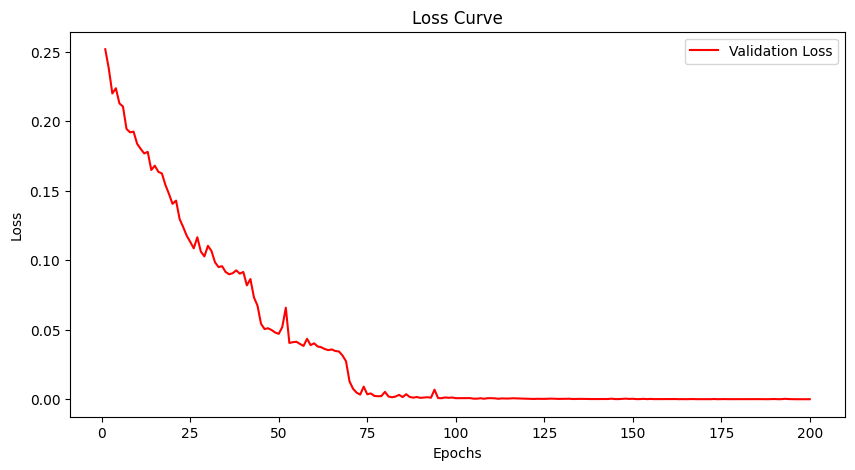

In [8]:
 tomita_3.visualize(epochs)

In [29]:
#4. Standard Positional encoding

In [13]:
# Tomita 3:
url = 'data/Data_from_paper/Tomita-3'
alibi = False
universal = False
no_posi_encoding = False
tomita_3 = Model.run_model(url, learning_rate = 0.001, batch_size = 32, embedding_dim =32, nheads= 4, split = 0.8, optimizer = 'RMSPROP', inner_layer_dim = 32, scheduler_lr= 200000, dropout = 0.0, alibi = alibi, no_posi_encoding= no_posi_encoding, num_layers= 8)

In [14]:
epochs = 100
tomita_3.train_eval(epochs)

Epoch [1/100], Loss: 0.186731, dev Accuracy: 7.00%
Epoch [2/100], Loss: 0.168091, dev Accuracy: 15.75%
Epoch [3/100], Loss: 0.145287, dev Accuracy: 18.15%
Epoch [4/100], Loss: 0.110069, dev Accuracy: 22.30%
Epoch [5/100], Loss: 0.098955, dev Accuracy: 28.15%
Epoch [6/100], Loss: 0.089726, dev Accuracy: 34.90%
Epoch [7/100], Loss: 0.087664, dev Accuracy: 35.60%
Epoch [8/100], Loss: 0.088684, dev Accuracy: 34.95%
Epoch [9/100], Loss: 0.080924, dev Accuracy: 40.00%
Epoch [10/100], Loss: 0.058692, dev Accuracy: 49.70%
Epoch [11/100], Loss: 0.049401, dev Accuracy: 52.50%
Epoch [12/100], Loss: 0.071997, dev Accuracy: 52.40%
Epoch [13/100], Loss: 0.042754, dev Accuracy: 55.05%
Epoch [14/100], Loss: 0.052955, dev Accuracy: 48.40%
Epoch [15/100], Loss: 0.037487, dev Accuracy: 58.40%
Epoch [16/100], Loss: 0.032281, dev Accuracy: 66.30%
Epoch [17/100], Loss: 0.031158, dev Accuracy: 70.15%
Epoch [18/100], Loss: 0.029949, dev Accuracy: 70.40%
Epoch [19/100], Loss: 0.026284, dev Accuracy: 74.00%
Epo

In [15]:
 tomita_3.test(0)

accuracy of all bin 0 is:  99.9 %


In [16]:
 tomita_3.test(1)

accuracy of all bin 1 is:  11.85 %


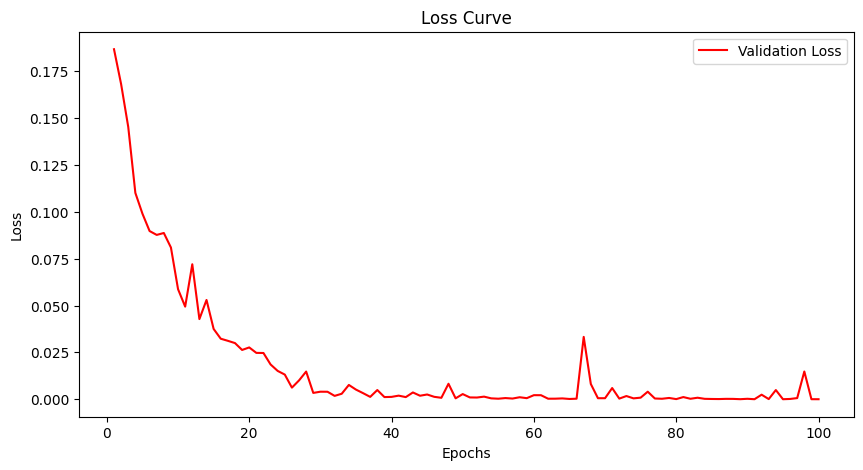

In [17]:
 tomita_3.visualize(epochs)

In [24]:
#5. Cos Positional encoding (#Layers = 2)

In [25]:
# Tomita 3:
url = 'data/Data_from_paper/Tomita-3'
alibi = False
universal = False
no_posi_encoding = False
tomita_3 = Model.run_model(url, learning_rate = 0.001, batch_size = 32, embedding_dim =32, nheads= 8, split = 0.8, optimizer = 'RMSPROP', inner_layer_dim = 64, scheduler_lr= 200000, dropout = 0.0, alibi = alibi, no_posi_encoding= no_posi_encoding, num_layers= 4)

In [26]:
epochs = 100
tomita_3.train_eval(epochs)

Epoch [1/100], Loss: 0.183264, dev Accuracy: 10.80%
Epoch [2/100], Loss: 0.156628, dev Accuracy: 18.75%
Epoch [3/100], Loss: 0.109397, dev Accuracy: 22.85%
Epoch [4/100], Loss: 0.114995, dev Accuracy: 17.50%
Epoch [5/100], Loss: 0.095907, dev Accuracy: 29.20%
Epoch [6/100], Loss: 0.091274, dev Accuracy: 32.25%
Epoch [7/100], Loss: 0.082608, dev Accuracy: 39.65%
Epoch [8/100], Loss: 0.091840, dev Accuracy: 42.25%
Epoch [9/100], Loss: 0.075662, dev Accuracy: 43.70%
Epoch [10/100], Loss: 0.054193, dev Accuracy: 57.65%
Epoch [11/100], Loss: 0.041862, dev Accuracy: 66.00%
Epoch [12/100], Loss: 0.015257, dev Accuracy: 82.90%
Epoch [13/100], Loss: 0.012002, dev Accuracy: 86.15%
Epoch [14/100], Loss: 0.010004, dev Accuracy: 89.10%
Epoch [15/100], Loss: 0.026782, dev Accuracy: 83.70%
Epoch [16/100], Loss: 0.007500, dev Accuracy: 88.50%
Epoch [17/100], Loss: 0.003052, dev Accuracy: 95.60%
Epoch [18/100], Loss: 0.000615, dev Accuracy: 98.85%
Epoch [19/100], Loss: 0.006759, dev Accuracy: 93.65%
Ep

In [27]:
 tomita_3.test(0)

accuracy of all bin 0 is:  100.0 %


In [28]:
 tomita_3.test(1)

accuracy of all bin 1 is:  13.95 %


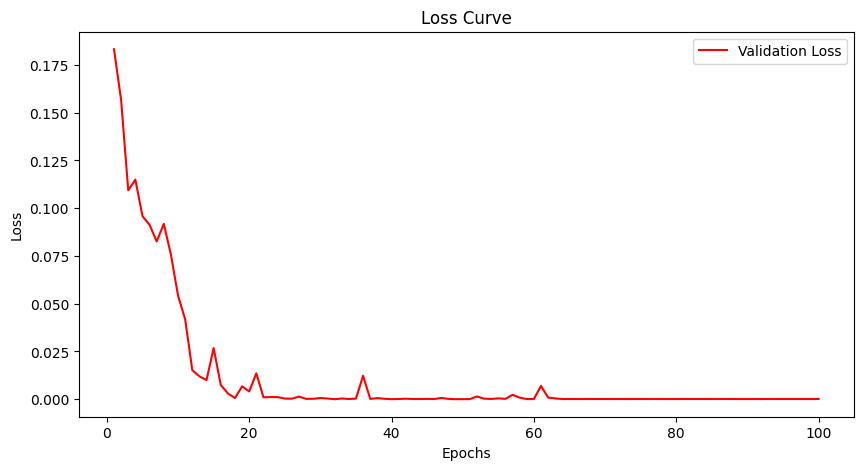

In [29]:
 tomita_3.visualize(epochs)

In [1]:
#6. learnable (# 2 Layers)

In [ ]:
# Tomita 3:
url = 'data/Data_from_paper/Tomita-3'
alibi = False
universal = False
no_posi_encoding = False
tomita_3 = Model.run_model(url, learning_rate = 0.001, batch_size = 32, embedding_dim =32, nheads= 4, split = 0.8, optimizer = 'RMSPROP', inner_layer_dim = 32, scheduler_lr= 200000, dropout = 0.0, alibi = alibi, pos_enc= 'learnable', no_posi_encoding= no_posi_encoding,  num_layers = 10)

In [ ]:
epochs = 100
tomita_3.train_eval(epochs)

In [ ]:
 tomita_3.test(0)

In [ ]:
 tomita_3.test(1)

In [ ]:
 tomita_3.visualize(epochs)

In [32]:
#7. learnable Period (# 2 Layers)

In [4]:
# Tomita 3:
url = 'data/Data_from_paper/Tomita-3'
alibi = False
universal = False
no_posi_encoding = False
tomita_3 = Model.run_model(url, learning_rate = 0.001, batch_size = 32, embedding_dim =32, nheads= 4, split = 0.8, optimizer = 'RMSPROP', inner_layer_dim = 32, scheduler_lr= 200000, dropout = 0.1, alibi = alibi, pos_enc= 'learn_period', no_posi_encoding= no_posi_encoding,  layer_number_main= 8)

In [5]:
epochs = 100
tomita_3.train_eval(epochs)

Epoch [1/100], Loss: 0.257617, dev Accuracy: 1.65%
Epoch [2/100], Loss: 0.244814, dev Accuracy: 4.70%
Epoch [3/100], Loss: 0.243002, dev Accuracy: 5.50%
Epoch [4/100], Loss: 0.238370, dev Accuracy: 6.05%
Epoch [5/100], Loss: 0.237481, dev Accuracy: 5.95%
Epoch [6/100], Loss: 0.230654, dev Accuracy: 5.95%
Epoch [7/100], Loss: 0.222651, dev Accuracy: 10.00%
Epoch [8/100], Loss: 0.219780, dev Accuracy: 10.40%
Epoch [9/100], Loss: 0.217520, dev Accuracy: 10.65%
Epoch [10/100], Loss: 0.209353, dev Accuracy: 12.20%
Epoch [11/100], Loss: 0.206407, dev Accuracy: 12.60%
Epoch [12/100], Loss: 0.204734, dev Accuracy: 12.70%
Epoch [13/100], Loss: 0.203268, dev Accuracy: 12.75%
Epoch [14/100], Loss: 0.197609, dev Accuracy: 14.35%
Epoch [15/100], Loss: 0.182315, dev Accuracy: 14.35%
Epoch [16/100], Loss: 0.180006, dev Accuracy: 12.45%
Epoch [17/100], Loss: 0.164769, dev Accuracy: 12.35%
Epoch [18/100], Loss: 0.146838, dev Accuracy: 8.95%
Epoch [19/100], Loss: 0.151177, dev Accuracy: 15.40%
Epoch [20

KeyboardInterrupt: 

In [ ]:
 tomita_3.test(0)

In [ ]:
 tomita_3.test(1)

In [ ]:
 tomita_3.visualize(epochs)

In [ ]:
#8 rope

In [9]:
# Tomita 3:

url = 'data/Data_from_paper/Tomita-3'
alibi = False
universal = False
no_posi_encoding = False
rope= True
tomita_3 = Model.run_model(url, learning_rate = 0.001, batch_size = 32, embedding_dim =32, nheads= 8, split = 0.8, optimizer = 'RMSPROP', inner_layer_dim = 32, scheduler_lr= 200000, dropout = 0.1, alibi = alibi, pos_enc= 'recurrent', no_posi_encoding= no_posi_encoding, universal = universal, layer_number_main= 4, rope= rope)

In [10]:
epochs = 100
tomita_3.train_eval(epochs)

Epoch [1/100], Loss: 0.172313, dev Accuracy: 2.80%
Epoch [2/100], Loss: 0.157591, dev Accuracy: 15.70%
Epoch [3/100], Loss: 0.104733, dev Accuracy: 30.50%
Epoch [4/100], Loss: 0.078715, dev Accuracy: 48.85%
Epoch [5/100], Loss: 0.057062, dev Accuracy: 52.35%
Epoch [6/100], Loss: 0.047468, dev Accuracy: 58.30%
Epoch [7/100], Loss: 0.042460, dev Accuracy: 58.25%
Epoch [8/100], Loss: 0.035065, dev Accuracy: 66.00%
Epoch [9/100], Loss: 0.033169, dev Accuracy: 63.15%
Epoch [10/100], Loss: 0.029547, dev Accuracy: 68.90%
Epoch [11/100], Loss: 0.022261, dev Accuracy: 74.60%
Epoch [12/100], Loss: 0.023399, dev Accuracy: 74.85%
Epoch [13/100], Loss: 0.025572, dev Accuracy: 72.05%
Epoch [14/100], Loss: 0.021667, dev Accuracy: 76.20%
Epoch [15/100], Loss: 0.014501, dev Accuracy: 83.55%
Epoch [16/100], Loss: 0.013575, dev Accuracy: 82.50%
Epoch [17/100], Loss: 0.012460, dev Accuracy: 84.35%
Epoch [18/100], Loss: 0.010178, dev Accuracy: 87.60%
Epoch [19/100], Loss: 0.010834, dev Accuracy: 86.70%
Epo

In [11]:
tomita_3.test(0)

accuracy of all bin 0 is:  98.85 %


In [12]:
tomita_3.test(1)

accuracy of all bin 1 is:  91.95 %


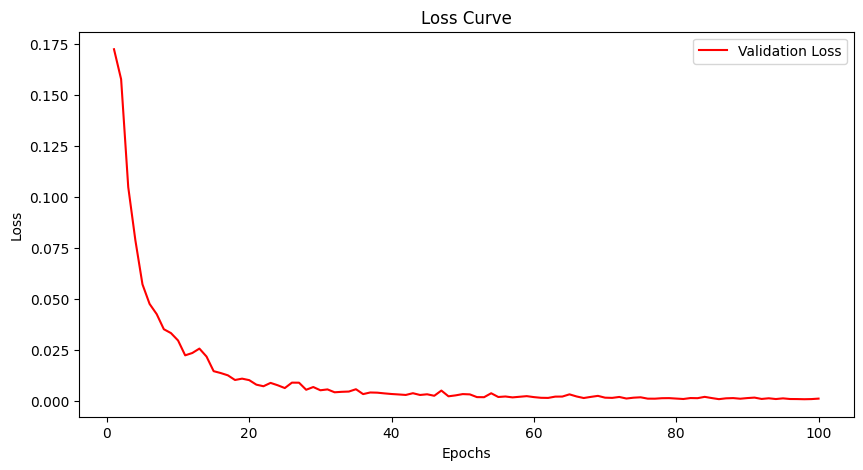

In [13]:
tomita_3.visualize(epochs)

In [7]:
#9 Alibi

In [6]:
# Tomita 3:

url = 'data/Data_from_paper/Tomita-3'
alibi = True
universal = False
no_posi_encoding = False
rope= False
tomita_3 = Model.run_model(url, learning_rate = 0.001, batch_size = 32, embedding_dim =32, nheads= 8, split = 0.8, optimizer = 'RMSPROP', inner_layer_dim = 32, scheduler_lr= 200000, dropout = 0.1, alibi = alibi, pos_enc= 'recurrent', no_posi_encoding= no_posi_encoding, universal = universal, layer_number_main= 8, rope= rope)

In [ ]:
epochs = 100
tomita_3.train_eval(epochs)

Epoch [1/100], Loss: 0.006184, dev Accuracy: 94.00%
Epoch [2/100], Loss: 0.000597, dev Accuracy: 99.45%
Epoch [3/100], Loss: 0.001991, dev Accuracy: 98.00%
Epoch [4/100], Loss: 0.000335, dev Accuracy: 99.70%
Epoch [5/100], Loss: 0.000895, dev Accuracy: 99.00%
Epoch [6/100], Loss: 0.000082, dev Accuracy: 99.90%
Epoch [7/100], Loss: 0.000115, dev Accuracy: 99.85%
Epoch [8/100], Loss: 0.000112, dev Accuracy: 99.90%
Epoch [9/100], Loss: 0.000088, dev Accuracy: 99.95%
Epoch [10/100], Loss: 0.000020, dev Accuracy: 99.95%
Epoch [11/100], Loss: 0.000719, dev Accuracy: 98.75%
Epoch [12/100], Loss: 0.000195, dev Accuracy: 99.90%
Epoch [13/100], Loss: 0.000139, dev Accuracy: 99.70%
Epoch [14/100], Loss: 0.000007, dev Accuracy: 99.95%
Epoch [15/100], Loss: 0.000033, dev Accuracy: 99.95%
Epoch [16/100], Loss: 0.000458, dev Accuracy: 99.70%
Epoch [17/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [18/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [19/100], Loss: 0.000008, dev Accuracy: 100.00%

In [ ]:
tomita_3.test(0)

In [ ]:
tomita_3.test(1)

In [ ]:
tomita_3.visualize(epochs)

In [ ]:
# Combos uni+recurrent

In [4]:
# Tomita 3:

url = 'data/Data_from_paper/Tomita-3'
alibi = False
universal = True
no_posi_encoding = False
rope= False
tomita_3 = Model.run_model(url, learning_rate = 0.001, batch_size = 32, embedding_dim =32, nheads= 8, split = 0.8, optimizer = 'RMSPROP', inner_layer_dim = 32, scheduler_lr= 200000, dropout = 0.1, alibi = alibi, pos_enc= 'recurrent', no_posi_encoding= no_posi_encoding, universal = universal, layer_number_main= 8, rope= rope)

In [5]:
epochs = 100
tomita_3.train_eval(epochs)

Epoch [1/100], Loss: 0.051130, dev Accuracy: 61.35%
Epoch [2/100], Loss: 0.014478, dev Accuracy: 85.35%
Epoch [3/100], Loss: 0.005106, dev Accuracy: 93.60%
Epoch [4/100], Loss: 0.003789, dev Accuracy: 95.60%
Epoch [5/100], Loss: 0.002879, dev Accuracy: 96.25%
Epoch [6/100], Loss: 0.002073, dev Accuracy: 96.95%
Epoch [7/100], Loss: 0.002288, dev Accuracy: 97.00%
Epoch [8/100], Loss: 0.001747, dev Accuracy: 97.50%
Epoch [9/100], Loss: 0.001261, dev Accuracy: 98.00%
Epoch [10/100], Loss: 0.001568, dev Accuracy: 97.90%
Epoch [11/100], Loss: 0.012265, dev Accuracy: 95.05%
Epoch [12/100], Loss: 0.001516, dev Accuracy: 97.95%
Epoch [13/100], Loss: 0.001180, dev Accuracy: 98.05%
Epoch [14/100], Loss: 0.001539, dev Accuracy: 97.50%
Epoch [15/100], Loss: 0.000951, dev Accuracy: 98.50%
Epoch [16/100], Loss: 0.001177, dev Accuracy: 98.10%
Epoch [17/100], Loss: 0.000848, dev Accuracy: 98.30%
Epoch [18/100], Loss: 0.000966, dev Accuracy: 98.40%
Epoch [19/100], Loss: 0.000938, dev Accuracy: 98.40%
Ep

In [6]:
tomita_3.test(0)

accuracy of all bin 0 is:  99.15 %


In [7]:
tomita_3.test(1)

accuracy of all bin 1 is:  97.75 %


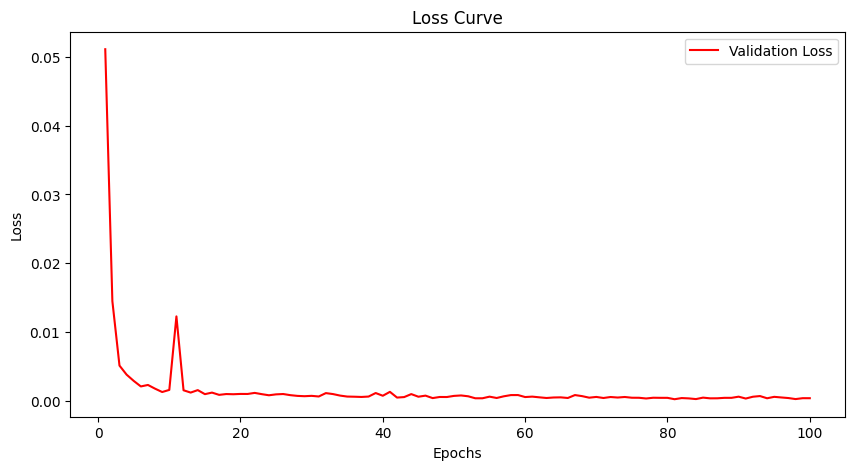

In [8]:
tomita_3.visualize(epochs)

In [ ]:
# combos: universal + cos

In [5]:
# Tomita 3:
url = 'data/Data_from_paper/Tomita-3'
alibi = False
universal = True
no_posi_encoding = False
rope = False
tomita_3 = Model.run_model(url, learning_rate = 0.001, batch_size = 32, embedding_dim =32, nheads= 8, split = 0.8, optimizer = 'RMSPROP', inner_layer_dim = 64, scheduler_lr= 200000, dropout = 0.1, alibi = alibi, pos_enc= 'cos',no_posi_encoding= no_posi_encoding, num_layers= 8, rope= rope)

In [ ]:
epochs = 100
tomita_3.train_eval(epochs)

Epoch [1/100], Loss: 0.260862, dev Accuracy: 0.60%
Epoch [2/100], Loss: 0.257506, dev Accuracy: 2.70%
Epoch [3/100], Loss: 0.250992, dev Accuracy: 4.25%
Epoch [4/100], Loss: 0.246288, dev Accuracy: 3.60%
Epoch [5/100], Loss: 0.243845, dev Accuracy: 3.55%
Epoch [6/100], Loss: 0.242121, dev Accuracy: 3.35%
Epoch [7/100], Loss: 0.242050, dev Accuracy: 3.85%
Epoch [8/100], Loss: 0.241321, dev Accuracy: 3.85%
Epoch [9/100], Loss: 0.243641, dev Accuracy: 4.15%


In [ ]:
tomita_3.test(0)

In [ ]:
tomita_3.test(1)

In [ ]:
tomita_3.visualize(epochs)

In [ ]:
# combos: universal + learnable

In [ ]:
# Tomita 3:
url = 'data/Data_from_paper/Tomita-3'
alibi = False
universal = True
no_posi_encoding = False
rope = False
tomita_3 = Model.run_model(url, learning_rate = 0.001, batch_size = 32, embedding_dim =32, nheads= 8, split = 0.8, optimizer = 'RMSPROP', inner_layer_dim = 64, scheduler_lr= 200000, dropout = 0.1, alibi = alibi, pos_enc= 'learnable',no_posi_encoding= no_posi_encoding, num_layers= 8, rope= rope)

In [ ]:
epochs = 100
tomita_3.train_eval(epochs)

In [ ]:
tomita_3.test(0)

In [ ]:
tomita_3.test(1)

In [ ]:
tomita_3.visualize(epochs)

In [ ]:
# combos: universal + learnable period

In [ ]:
# Tomita 3:
url = 'data/Data_from_paper/Tomita-3'
alibi = False
universal = True
no_posi_encoding = False
rope = False
tomita_3 = Model.run_model(url, learning_rate = 0.001, batch_size = 32, embedding_dim =32, nheads= 8, split = 0.8, optimizer = 'RMSPROP', inner_layer_dim = 64, scheduler_lr= 200000, dropout = 0.1, alibi = alibi, pos_enc= 'lear_period',no_posi_encoding= no_posi_encoding, num_layers= 8, rope= rope)

In [ ]:
epochs = 100
tomita_3.train_eval(epochs)

In [ ]:
tomita_3.test(0)

In [ ]:
tomita_3.test(1)

In [ ]:
tomita_3.visualize(epochs)